# Goal: classify whether mushroom is safe to eat or poisonous

In [226]:
# importing relevant libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. retrieve data

In [228]:
# import dataset
shroom = pd.read_csv("/Users/macbookair/Downloads/mushrooms.csv")

In [229]:
# look at how data looks like
shroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


if we look at column 'class', it is clearly divided into two: p = poisonous, e = edible.
head of dataset shows that we have our data as letters not numbers, that means we need to encode these.

# 2. preprocess = clean and explore

In [232]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each column in the DataFrame
for column in shroom.columns:
    shroom[column] = label_encoder.fit_transform(shroom[column])

# Display the transformed dataset
shroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [233]:
y = shroom['class']
X = shroom.drop('class', axis=1)

In [234]:
# we want to scale the data so the features take on similar ranges
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() # create scaler object
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [235]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1.029712,0.140128,-0.198250,1.185917,0.881938,0.162896,-0.438864,1.494683,-0.228998,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
1,1.029712,0.140128,1.765874,1.185917,-1.970316,0.162896,-0.438864,-0.669038,-0.228998,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.250471,-1.313108,-0.295730
2,-2.087047,0.140128,1.373049,1.185917,-0.544189,0.162896,-0.438864,-0.669038,0.053477,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.250471,-1.313108,0.867149
3,1.029712,0.953270,1.373049,1.185917,0.881938,0.162896,-0.438864,1.494683,0.053477,-1.144806,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,0.948081,-0.670195,-0.514389,2.030028
4,1.029712,0.140128,-0.591075,-0.843230,0.406562,0.162896,2.278612,-0.669038,-0.228998,0.873511,...,0.586385,0.622441,0.631991,0.0,0.142037,-0.256132,-1.272216,-0.250471,-2.910546,-0.295730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,-0.216992,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,1.748325,-1.144806,...,0.586385,-0.429288,-0.416681,0.0,-3.979055,-0.256132,0.948081,-1.509643,-2.111827,0.285710
8120,1.029712,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,1.748325,-1.144806,...,0.586385,-0.429288,-0.416681,0.0,-8.100146,-0.256132,0.948081,-1.509643,0.284330,0.285710
8121,-0.840343,0.140128,-0.198250,-0.843230,0.406562,-6.138869,-0.438864,-0.669038,0.053477,-1.144806,...,0.586385,-0.429288,-0.416681,0.0,-3.979055,-0.256132,0.948081,-1.509643,-2.111827,0.285710
8122,-0.216992,0.953270,-0.198250,-0.843230,1.832689,0.162896,-0.438864,1.494683,-1.358896,0.873511,...,-0.893053,0.622441,0.631991,0.0,0.142037,-0.256132,-1.272216,1.428426,0.284330,0.285710


# 3. split data

In [237]:
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# 4. develop and train model

In [239]:
# define and fit the decision tree model

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [240]:
# evaluate accuracy of model

accuracy = model.score(X_test, y_test)
print(f"Accuracy on the test set: {accuracy:.2f}")

Accuracy on the test set: 0.95


# 5. validate and evaluate model

In [242]:
# create prediction for test dataset

y_pred = model.predict(X_test)

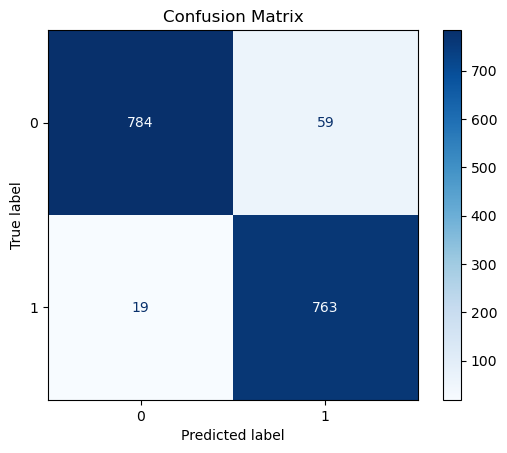

In [243]:
# confusion matrix for 1st model

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

In [244]:
# Check the unique labels in the training and test data - to check how many unique labels are there
print("Unique classes in y_train:", y_train.unique())
print("Unique classes in y_test:", y_test.unique())

# 1 = poisonous
# 0 = edible

Unique classes in y_train: [1 0]
Unique classes in y_test: [0 1]


In [245]:
# Berechnen der Metriken für jede Klasse und zusammengefasst
report = classification_report(y_test, y_pred, target_names=['poison', 'safe'])

# Drucken des Berichts
print(report)

              precision    recall  f1-score   support

      poison       0.98      0.93      0.95       843
        safe       0.93      0.98      0.95       782

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



report seems to be performing well.. so maybe no tuning this time

# decision tree

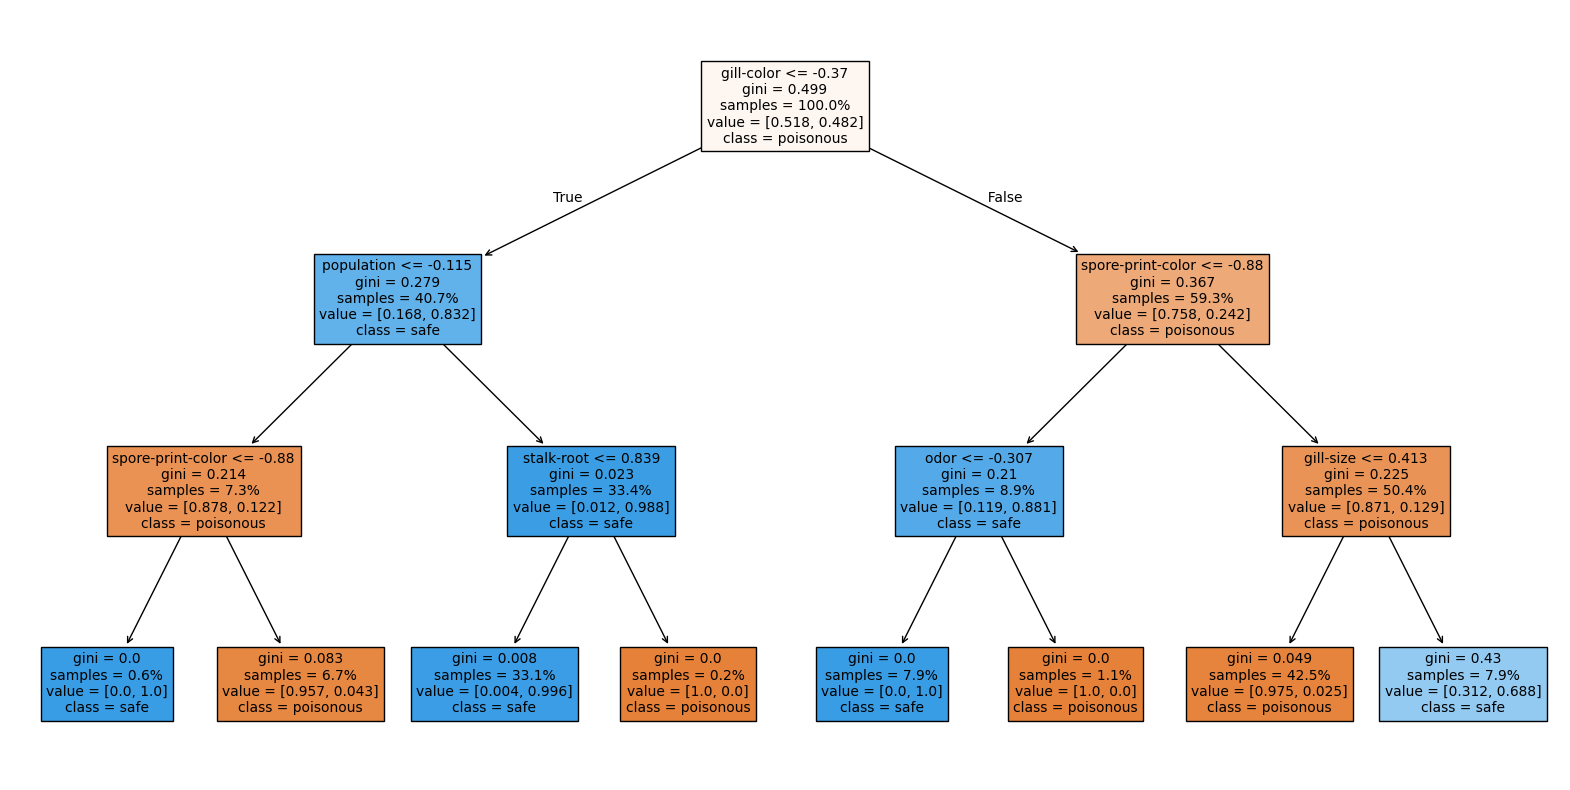

In [248]:
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(model, filled=True, feature_names=list(X_train.columns), class_names=['poisonous', 'safe'], proportion=True)
plt.show()

In [264]:
import os
os.getcwd()

'/Users/macbookair'